<a href="https://colab.research.google.com/github/marissawalker/data-quality-odw-2020/blob/master/MC170720.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -- Uncomment following line if running in Google Colab
! pip install -q 'gwpy==1.0.1'

     |████████████████████████████████| 1.4MB 3.5MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 61kB 9.3MB/s 
     |████████████████████████████████| 2.7MB 48.6MB/s 


In [0]:
%matplotlib inline
import gwpy
from gwosc.datasets import event_gps
from gwpy.timeseries import TimeSeries
from gwosc.datasets import find_datasets
from gwosc import catalog
from gwosc.datasets import run_segment
from gwpy.segments import DataQualityFlag

In [3]:
# Find events marked as marginal candidates "MC"
# These are candidates that do not have high significance in the searches,
# and/or have noise artifacts that might have caused them 
events = find_datasets(type='event',match='MC')
print(events)

['MC151008_R1', 'MC151012A_R1', 'MC151116_R1', 'MC161202_R1', 'MC161217_R1', 'MC170208_R1', 'MC170219_R1', 'MC170405_R1', 'MC170412_R1', 'MC170423_R1', 'MC170616_R1', 'MC170630_R1', 'MC170705_R1', 'MC170720_R1']


In [4]:
from gwosc.datasets import event_gps
gps = event_gps('MC170720_R1')

print(gps)

1184625889.8


In [6]:
# One way of converting between gps time and human readable format is through
# GWpy tconvert: 
from gwpy.time import tconvert

tconvert(gps).isoformat()

'2017-07-20T22:44:31.800000'

In [7]:
# Get data for 10 seconds around the event, from L1 and H1:
segment = (gps-5, gps+5)
hdata = TimeSeries.fetch_open_data('H1', *segment, verbose=True)
ldata = TimeSeries.fetch_open_data('L1', *segment, verbose=True)

Fetched 1 URLs from www.gw-openscience.org for [1184625884 .. 1184625895))
Reading data... [Done]
Fetched 1 URLs from www.gw-openscience.org for [1184625884 .. 1184625895))


/usr/local/lib/python3.6/dist-packages/gwpy/types/series.py:926: UserWarning: TimeSeries.crop given end larger than current end, crop will end when the Series actually ends.
  % type(self).__name__)


Reading data... [Done]


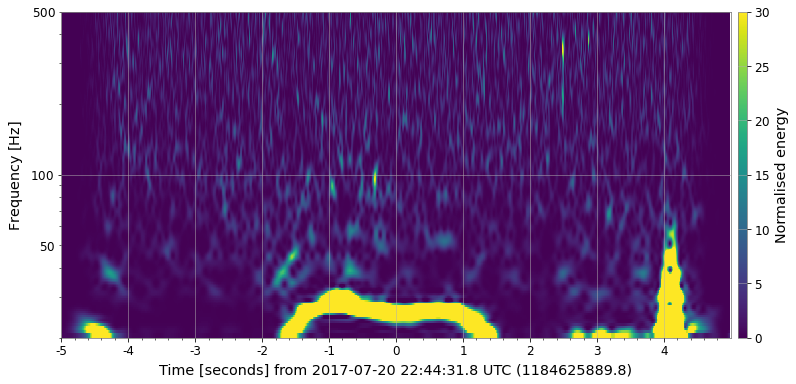

In [19]:
# q transform of L1 data
qtrans = ldata.q_transform(frange=(20,500), qrange=(4,100))
plot = qtrans.plot()
plot.colorbar(label="Normalised energy")
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale("log")
plot.colorbars[0].mappable.set_clim(0,30)
plot.savefig('MC161217_qtrans_L1.png')

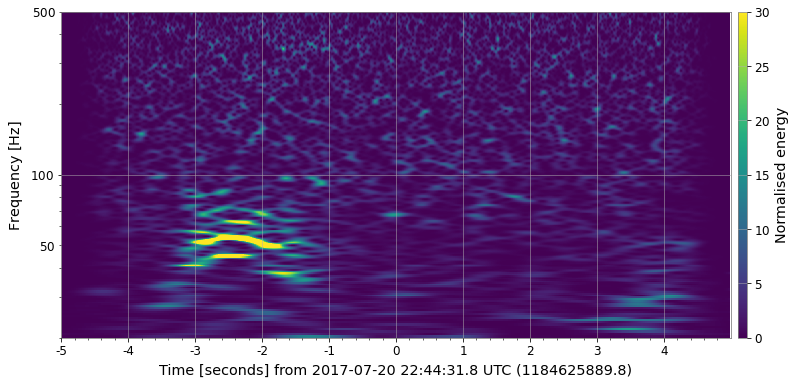

In [20]:
# q transform of H1 data
qtrans = hdata.q_transform(frange=(20,500), qrange=(4,100))
plot = qtrans.plot()
plot.colorbar(label="Normalised energy")
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale("log")
plot.colorbars[0].mappable.set_clim(0,30)
plot.savefig('MC161217_qtrans_H1.png')

In [0]:
# To see the data quality for a bit longer, let's make a segment of a minute
segment = (gps-60, gps+60)

# And check the L1 Data segments
L1data_segs = DataQualityFlag.fetch_open_data('L1_DATA', segment[0],segment[1] )

In [22]:
# Print out the data quality segments for that minute
print(segment)
print(L1data_segs.active)

(1184625829.8, 1184625949.8)
[[1184625829 ... 1184625908)]


The L1_DATA segment ends earlier than the minute around the event! Let's check how close the end of the data segment is to the event:

In [18]:
# Calculate difference between end of data segment and the event
L1data_segs.active[0][1]-gps

18.200000047683716